# Dfsu - Vertical Profile
This notebooks demonstrates plotting of vertical profile (transect) dfsu. 

In [1]:
import matplotlib.pyplot as plt
import mikeio

In [2]:
filename = "../tests/testdata/oresund_vertical_slice.dfsu"
ds = mikeio.read(filename)
ds

<mikeio.Dataset>
dims: (time:3, element:441)
time: 1997-09-15 21:00:00 - 1997-09-16 03:00:00 (3 records)
geometry: DfsuVerticalProfileSigmaZ (441 elements, 4 sigma-layers, 5 z-layers)
items:
  0:  Temperature <Temperature> (degree Celsius)
  1:  Salinity <Salinity> (PSU)

In [3]:
g = ds.geometry
g

Flexible Mesh Geometry: DfsuVerticalProfileSigmaZ
number of nodes: 550
number of elements: 441
number of layers: 9 (4 sigma-layers, max 5 z-layers)
projection: UTM-33

In [4]:
import numpy as np
ec2d = g.element_coordinates[g.top_elements,:2]
xe, ye = ec2d[:,0], ec2d[:,1]
np.argmin((xe - 359615.47172605) ** 2 + (ye - 6.145e+06) ** 2)

11

In [5]:
g._find_nearest_element_2d([359615,6.145e+06])

array([11])

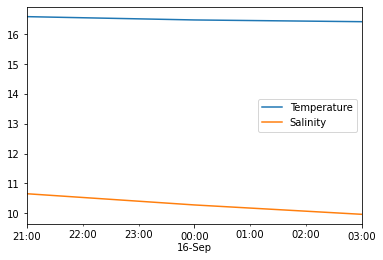

In [6]:
ds.sel(x=359615, y=6.145e+06, z=-3).plot()

The geometry can be visualized from above (to be shown on a map) using g.plot() and from the side showing the 2dv transect mesh with g.plot.mesh(). 

Let's show the transect on top of the model domain...

In [7]:
dfs = mikeio.open("../tests/testdata/oresundHD_run1.dfsu")
model_domain = dfs.geometry

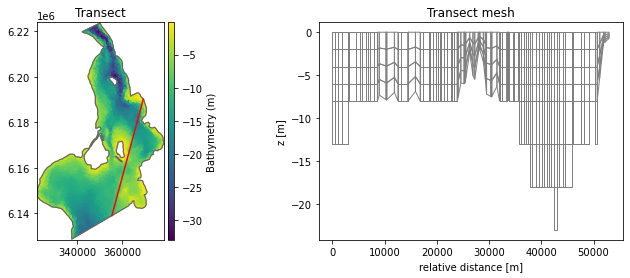

In [8]:
_, ax = plt.subplots(1,2,figsize=(12,4))
# left-side plot
model_domain.plot(ax=ax[0], title="Transect")
g.plot(color="r", ax=ax[0])

# right-side plot
g.plot.mesh(ax=ax[1], title="Transect mesh");

We would like to show two points of interest A and B on the map. The geometry object has a method for finding the nearest relative position...

In [9]:
ptA = [3.55e+05,  6.145e+06]
ptB = [3.62e+05,  6.166e+06] 
distA = g.get_nearest_relative_distance(ptA)
distB = g.get_nearest_relative_distance(ptB)
distA, distB

(5462.327351236415, 27589.50308534942)

Let's now visualize the points on the map and transect

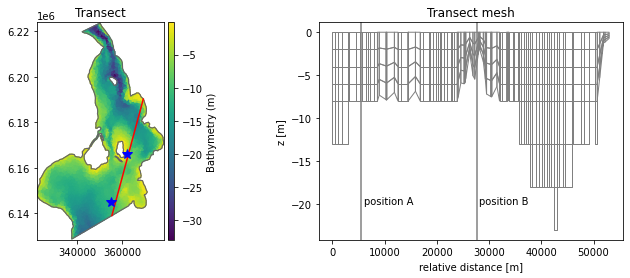

In [10]:
_, ax = plt.subplots(1,2,figsize=(12,4))
model_domain.plot(ax=ax[0], title="Transect")
g.plot(color="r", ax=ax[0])
ax[0].plot(*ptA, color="b", marker="*", markersize=10)
ax[0].plot(*ptB, color="b", marker="*", markersize=10)

g.plot.mesh(ax=ax[1], title="Transect mesh")
ax[1].axvline(distA, color="0.5")
ax[1].text(distA + 500, -20, 'position A')
ax[1].axvline(distB, color="0.5")
ax[1].text(distB + 500, -20, 'position B');

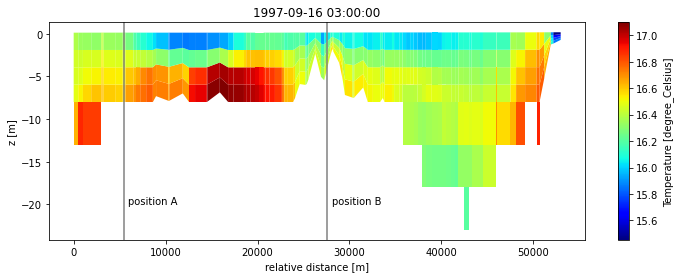

In [11]:
ax = ds.Temperature.isel(time=2).plot(figsize=(12,4))
ax.axvline(distA, color="0.5")
ax.text(distA + 500, -20, 'position A')
ax.axvline(distB, color="0.5")
ax.text(distB + 500, -20, 'position B');

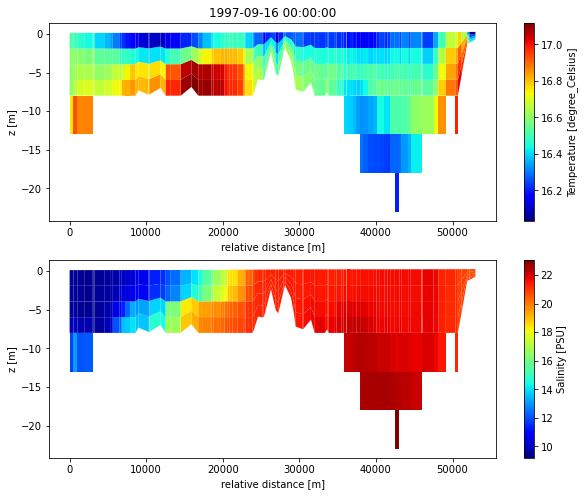

In [12]:
time_step = 1

fig, ax = plt.subplots(2,1,figsize=(10,8))
ds.Temperature[time_step].plot(ax=ax[0])
ds.Salinity[time_step].plot(ax=ax[1], title=None);

## Kalundborg case
A non-straight vertical profile (transect) from a model in geographical coordinates.

In [13]:
filename = "../tests/testdata/kalundborg_coarse.mesh"
model_domain = mikeio.open(filename).geometry
filename = "../tests/testdata/kalundborg_transect.dfsu"
ds = mikeio.read(filename)
ds

<mikeio.Dataset>
dims: (time:10, element:1708)
time: 2018-02-11 00:00:00 - 2018-02-11 11:15:00 (10 records)
geometry: DfsuVerticalProfileSigmaZ (1708 elements, 5 sigma-layers, 20 z-layers)
items:
  0:  U velocity <u velocity component> (meter per sec)
  1:  V velocity <v velocity component> (meter per sec)
  2:  Temperature <Temperature> (degree Celsius)
  3:  Salinity <Salinity> (PSU)

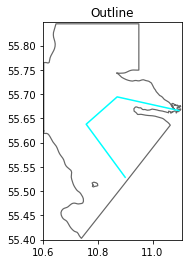

In [14]:
ax = model_domain.plot.outline()
ds.geometry.plot(color="cyan", ax=ax);

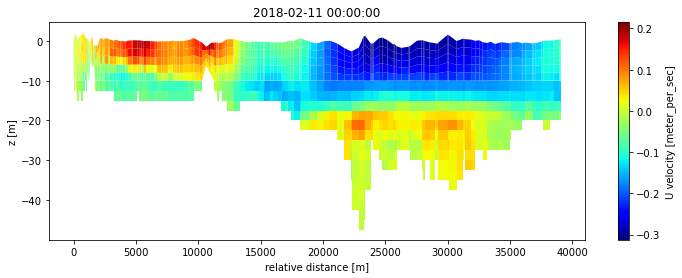

In [15]:
ds.U_velocity.plot(figsize=(12,4));

## Spatial subsetting 

Both points and parts of the 2dv domain can selected.

In [16]:
ptA = [10.8, 55.6, -3]
ds.geometry.get_nearest_relative_distance(ptA)

28757.285254363647

Points can be extracted:

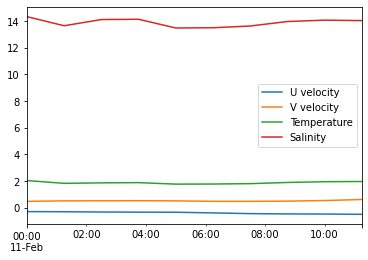

In [56]:
ds_pt = ds.sel(x=ptA[0], y=ptA[1], z=ptA[2])
ds_pt.plot();

And vertical columns...

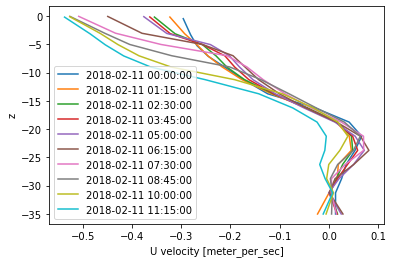

In [61]:
u_col = ds.sel(x=ptA[0], y=ptA[1]).U_velocity
u_col.plot()
plt.legend(ds.time);

Or parts of the 2dv transect... here selecting the part with relative distance between 10 and 25 km

In [40]:
rd = ds.geometry.relative_element_distance
idx = np.where(np.logical_and(10000 < rd, rd < 25000))[0]
dssub = ds.isel(element=idx)
dssub

<mikeio.Dataset>
dims: (time:10, element:579)
time: 2018-02-11 00:00:00 - 2018-02-11 11:15:00 (10 records)
geometry: DfsuVerticalProfileSigmaZ (579 elements, 4 sigma-layers, 16 z-layers)
items:
  0:  U velocity <u velocity component> (meter per sec)
  1:  V velocity <v velocity component> (meter per sec)
  2:  Temperature <Temperature> (degree Celsius)
  3:  Salinity <Salinity> (PSU)

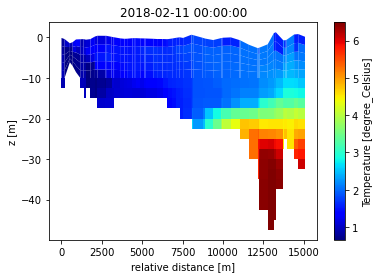

In [42]:
dssub.Temperature.plot();

Or specific layers: 

In [49]:
# select top 5 layers
idx = ds.geometry.find_index(layers=range(-6,-1))
dssub = ds.isel(element=idx)
dssub

<mikeio.Dataset>
dims: (time:10, element:971)
time: 2018-02-11 00:00:00 - 2018-02-11 11:15:00 (10 records)
geometry: DfsuVerticalProfileSigmaZ (971 elements, 3 sigma-layers, 2 z-layers)
items:
  0:  U velocity <u velocity component> (meter per sec)
  1:  V velocity <v velocity component> (meter per sec)
  2:  Temperature <Temperature> (degree Celsius)
  3:  Salinity <Salinity> (PSU)

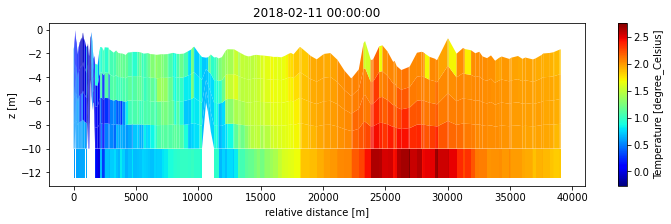

In [53]:
dssub.Temperature.plot(figsize=(12,3));